In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

C:\Users\idsl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## 讀取檔案
training_data = pd.read_csv('adult.data',sep=", ",header=None,engine='python')
test_data = pd.read_csv('adult.test',sep=", ",header=None,engine='python',skiprows=1)
t_d = test_data
training_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
## 原始資料長度
print(f'training_data：{len(training_data)} records')
print(f'test_data：{len(test_data)} records')

training_data：32561 records
test_data：16281 records


In [5]:
## 命名欄位
training_data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
test_data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
feature_cols = ['age','workclass','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']
training_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
for column in training_data.columns:
    print(training_data[column].value_counts())
    
## education跟education-num數量一樣所以取education-num即可，故刪除education
training_data = training_data.drop(columns=['education'])
test_data = test_data.drop(columns=['education'])

## fnlwgt 是ID，故刪除
training_data = training_data.drop(columns=['fnlwgt'])
test_data = test_data.drop(columns=['fnlwgt'])

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
9     10501
10     7291

In [8]:
convert = {"sex":{"Male":1, "Female":0},"income" :{"<=50K":0, ">50K":1}}
training_data = training_data.replace(convert)
convert = {"sex":{"Male":1, "Female":0},"income" :{"<=50K.":0, ">50K.":1}}
test_data = test_data.replace(convert)
training_data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,0


In [9]:
test_data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1
4,18,?,10,Never-married,?,Own-child,White,0,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,0,0,0,36,United-States,0
16277,64,?,9,Widowed,?,Other-relative,Black,1,0,0,40,United-States,0
16278,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,50,United-States,0
16279,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,5455,0,40,United-States,0


In [10]:
# 缺失值數量
print("=======training_data=======")
for col,cnt in zip(training_data.columns,(training_data=='?').sum(axis = 0)):
    if cnt > 0:
        print(str(col) + ': ' + str(cnt) + ' records has missing value')
        

print("=======test_data=======")
for col,cnt in zip(test_data.columns,(test_data=='?').sum(axis = 0)):
    if cnt > 0:
        print(str(col) + ': ' + str(cnt) + ' records has missing value')

=======training_data=======
workclass: 1836 records has missing value
occupation: 1843 records has missing value
native-country: 583 records has missing value
=======test_data=======
workclass: 963 records has missing value
occupation: 966 records has missing value
native-country: 274 records has missing value


In [11]:
# training_data = training_data[training_data['workclass']!='?']       
# training_data = training_data[training_data['occupation']!='?']      
# training_data = training_data[training_data['native-country']!='?']   

# test_data = test_data[test_data['workclass']!='?']       
# test_data = test_data[test_data['occupation']!='?']      
# test_data = test_data[test_data['native-country']!='?']   

# ## 刪除缺失值後資料長度
# print(f'training_data：{len(training_data)} records')
# print(f'test_data：{len(test_data)} records')

In [12]:
training_data.replace('?', 'other', inplace=True)
test_data.replace('?', 'other', inplace=True)

In [13]:
# 確認無缺失值
print("=======training_data=======")
for col,cnt in zip(training_data.columns,(training_data=='?').sum(axis = 1)):
    if cnt == 0:
        print(str(col) + ': ' + str(cnt) + ' records')
        
        
print("=======test_data=======")    
for col,cnt in zip(test_data.columns,(test_data=='?').sum(axis = 1)):
    if cnt == 0:
        print(str(col) + ': ' + str(cnt) + ' records')

=======training_data=======
age: 0 records
workclass: 0 records
education-num: 0 records
marital-status: 0 records
occupation: 0 records
relationship: 0 records
race: 0 records
sex: 0 records
capital-gain: 0 records
capital-loss: 0 records
hours-per-week: 0 records
native-country: 0 records
income: 0 records
=======test_data=======
age: 0 records
workclass: 0 records
education-num: 0 records
marital-status: 0 records
occupation: 0 records
relationship: 0 records
race: 0 records
sex: 0 records
capital-gain: 0 records
capital-loss: 0 records
hours-per-week: 0 records
native-country: 0 records
income: 0 records


In [14]:
training_data = pd.get_dummies(training_data)
test_data = pd.get_dummies(test_data)
feature_cols = training_data.columns
# print(*feature_cols,sep='\n')
training_data['income'] = training_data['income'].astype('int64')
test_data['income'] = test_data['income'].astype('int64')
# training_data['sex'] = training_data['sex'].astype('int64')
# test_data['sex'] = test_data['sex'].astype('int64')
for column in training_data.columns:
    if column not in test_data.columns:
        test_data[column] = 0
        print(training_data[column])
        print(test_data[column])
        break

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: native-country_Holand-Netherlands, Length: 32561, dtype: uint8
0        0
1        0
2        0
3        0
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    0
Name: native-country_Holand-Netherlands, Length: 16281, dtype: int64


In [15]:
X = training_data.drop('income',axis=1)
y = training_data['income']
# print(Xt.columns)
Xt = test_data.drop('income',axis=1)
# Xt.columns has 87 columns but X.columns has 88 columns
Xt.columns = X.columns
yt = test_data['income']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

[0.7592507293106096, 0.8278826961461692, 0.8438507600184247, 0.844311377245509, 0.8456932289267619, 0.8541378780899739, 0.8567480423767849, 0.857976354982343, 0.8542914171656687, 0.8526024873330262, 0.8516812528788577, 0.8529095654844158, 0.8512206356517734, 0.8506064793489944, 0.8458467680024566, 0.8461538461538461, 0.8486104713649624, 0.844311377245509]
[0.7637737239727289, 0.8306615072784227, 0.8447884036607088, 0.8452183526810393, 0.8474909403599288, 0.8543087033965973, 0.8576868742706222, 0.8575026104047663, 0.848289417111971, 0.8458939868558443, 0.8443584546403784, 0.838523432221608, 0.8396290154167434, 0.8393833302622689, 0.8379706406240403, 0.8329340949573122, 0.8310300350101345, 0.8297401879491432]


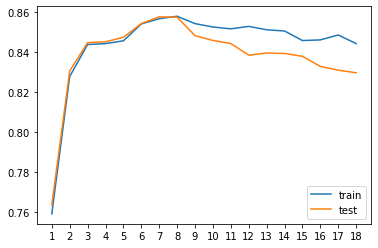

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

ax = []
a_train = []
a_test = []
for depth in range(1,19):
    ax.append(depth)
    dt = DecisionTreeClassifier(criterion='gini',max_depth=depth)
    dt.fit(X_train,y_train)
    a_train.append(dt.score(X_test,y_test))
    dt = DecisionTreeClassifier(criterion='gini',max_depth=depth)
    dt.fit(X_train,y_train)
    a_test.append(dt.score(Xt,yt))
    
print(a_train)
plt.plot(ax, a_train,label='train')
print(a_test)
plt.plot(ax, a_test,label='test')
plt.xticks(ax)
plt.legend()
plt.show()

In [18]:
## 取最佳深度
print("=======training_data=======")
train_best = max(a_train)
for i in range(len(a_train)):
    if a_train[i]==train_best:
        print(f' depth : {i} , acc : {train_best:.3f}')
        best_depth = i+1
        break
        
print("=======test_data=======")
test_best = max(a_test)
for i in range(len(a_train)):
    if a_test[i]==test_best:
        print(f' depth : {i} , acc : {test_best:.3f}')
        break

=======training_data=======
 depth : 7 , acc : 0.858
=======test_data=======
 depth : 6 , acc : 0.858


[0.7592507293106096, 0.8189774297558728, 0.8278826961461692, 0.8436972209427299, 0.8436972209427299, 0.8436972209427299, 0.8436972209427299, 0.8481498541378781, 0.8481498541378781, 0.8481498541378781, 0.8481498541378781, 0.85014586212191, 0.8512206356517734, 0.8515277138031629, 0.8515277138031629, 0.8515277138031629, 0.8524489482573315, 0.8539843390142792, 0.8539843390142792, 0.8549055734684478, 0.855366190695532, 0.8555197297712268, 0.8555197297712268, 0.8555197297712268, 0.8555197297712268, 0.8555197297712268, 0.8555197297712268, 0.8555197297712268, 0.8550591125441425, 0.8549055734684478, 0.8549055734684478, 0.8562874251497006, 0.8562874251497006, 0.8562874251497006, 0.8575157377552587, 0.8576692768309535, 0.8576692768309535, 0.8576692768309535, 0.857362198679564, 0.857362198679564, 0.857362198679564, 0.857362198679564, 0.857362198679564, 0.8575157377552587, 0.8575157377552587, 0.8575157377552587, 0.8575157377552587, 0.8575157377552587, 0.8575157377552587, 0.8575157377552587, 0.85843

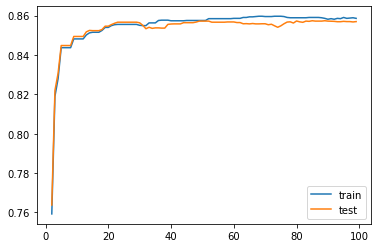

In [19]:
import numpy as np
import matplotlib.pyplot as plt

ax = []
a_train = []
a_test = []
for node in range(2,100):
    ax.append(node)
    dt = DecisionTreeClassifier(criterion='gini',max_depth=best_depth, max_leaf_nodes = node)
    dt.fit(X_train,y_train)
    a_train.append(dt.score(X_test,y_test))
    dt = DecisionTreeClassifier(criterion='gini',max_depth=depth, max_leaf_nodes = node)
    dt.fit(X_train,y_train)
    a_test.append(dt.score(Xt,yt))

print(a_train)
plt.plot(ax, a_train,label='train')
print(a_test)
plt.plot(ax, a_test,label='test')
plt.legend()
plt.show()

In [20]:
print("=======training_data=======")
train_best = max(a_train)
for i in range(len(a_train)):
    if a_train[i]==train_best:
        print(f' node : {i+1} , acc : {train_best:.3f}')
        best_node1 = i+1
        break
        
print("=======test_data=======")
test_best = max(a_test)
for i in range(len(a_train)):
    if a_test[i]==test_best:
        print(f' node : {i+1} , acc : {test_best:.3f}')
        best_node2 = i+1
        break

=======training_data=======
 node : 67 , acc : 0.860
=======test_data=======
 node : 84 , acc : 0.857


[0.7592507293106096, 0.8278826961461692, 0.8438507600184247, 0.844311377245509, 0.8455396898510671, 0.8539843390142792, 0.8565945033010901, 0.8595117457392907, 0.8558268079226163, 0.8536772608628896, 0.8545984953170582, 0.8575157377552587, 0.8575157377552587, 0.8561338860740059, 0.855366190695532, 0.855366190695532, 0.8547520343927529, 0.8547520343927529]
[0.7637737239727289, 0.8306615072784227, 0.8447884036607088, 0.8452183526810393, 0.8474295190713101, 0.8542472821079786, 0.8577482955592408, 0.8573183465389104, 0.8561513420551563, 0.8535716479331736, 0.8543087033965973, 0.8554757078803513, 0.8552300227258768, 0.8572569252502917, 0.8565198697868681, 0.8567655549413427, 0.8573183465389104, 0.8572569252502917]


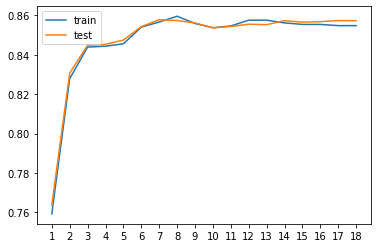

In [21]:
import numpy as np
import matplotlib.pyplot as plt

ax = []
a_train = []
a_test = []
for depth in range(1,19):
    ax.append(depth)
    dt = DecisionTreeClassifier(criterion='gini',max_depth=depth, max_leaf_nodes = best_node1)
    dt.fit(X_train,y_train)
    a_train.append(dt.score(X_test,y_test))
#     dt.fit(Xt,yt)
    dt = DecisionTreeClassifier(criterion='gini',max_depth=depth, max_leaf_nodes = best_node2)
    dt.fit(X_train,y_train)
    a_test.append(dt.score(Xt,yt))
    
print(a_train)
plt.plot(ax, a_train,label='train')
print(a_test)
plt.plot(ax, a_test,label='test')
plt.xticks(ax)
plt.legend()
plt.show()

In [22]:
print("=======training_data=======")
train_best = max(a_train)
for i in range(len(a_train)):
    if a_train[i]==train_best:
        print(f' depth : {i+1} , acc : {train_best*100:.3f}')
        break
        
print("=======test_data=======")
test_best = max(a_test)
for i in range(len(a_train)):
    if a_test[i]==test_best:
        print(f' depth : {i+1} , acc : {test_best*100:.3f}')
        best_depth = i+1
        break

=======training_data=======
 depth : 8 , acc : 85.951
=======test_data=======
 depth : 7 , acc : 85.775


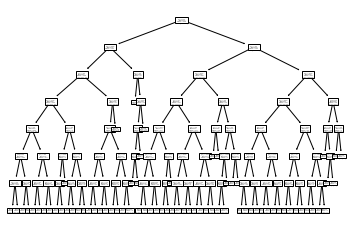

In [23]:
import matplotlib.pyplot as plt
from sklearn import tree
dt = DecisionTreeClassifier(criterion='gini',max_depth=best_depth, max_leaf_nodes = best_node2)
dt.fit(X_train,y_train)
tree.plot_tree(dt)
plt.show()

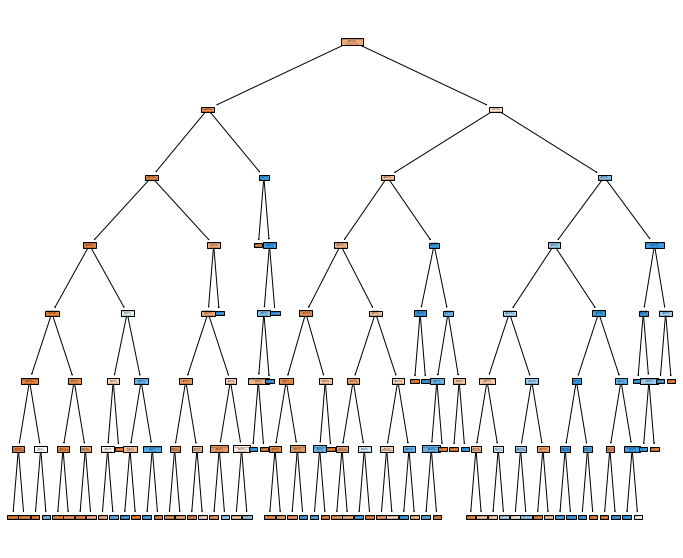

In [24]:
fig = plt.figure(figsize=(12,10))
# _ = tree.plot_tree(dt,filled=True)
_ = tree.plot_tree(dt, feature_names = feature_cols, filled = True)

In [25]:
print(f' best_depth：{best_depth} & best_node：{best_node2}')

 best_depth：7 & best_node：84


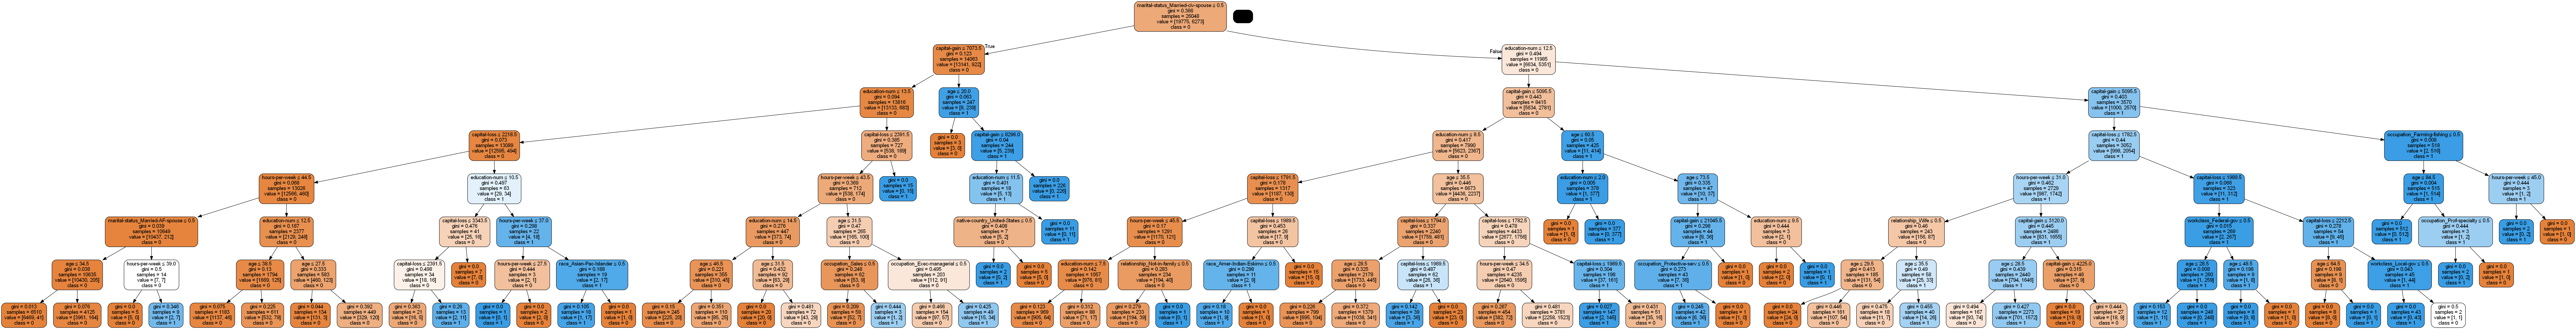

In [26]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cart.png')
Image(graph.create_png())
